# Analyzing Boosting Tree Ensembles

Boosting is a type of ensemble methods that combines the predictions from many base (or weak) learners sequentially. A base learner in this case is often a simple model (in our case, a decision tree classifiers). Adaptive Boosting (AdaBoost) algorithm is one of the well-known boosting methods, which involves using relatively small trees sequentially trained. Consecutive models attempt to refine and correct the predictions made by the previous model by weighing the training dataset and assigning more importance on training instances which the prior model made prediction errors.

You will use a subset of the auto-mpg dataset from UCI (https://archive.ics.uci.edu/ml/datasets/auto+mpg). A cleaned and preprocessed copy of that dataset is provided to you (`auto-mpg6780.csv`) and using the below code you can read it into a pandas DataFrame with the following snippet.

In [2]:
#import utility libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desc_features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
target_feature = 'origin'
target_names = ['US', 'EU', 'ASIA']
df = pd.read_csv('auto-mpg6780.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,1
1,15.0,8,350.0,165,3693,11.5,1
2,18.0,8,318.0,150,3436,11.0,1
3,16.0,8,304.0,150,3433,12.0,1
4,17.0,8,302.0,140,3449,10.5,1


## Q1. Create training and testing datasets (5 pts)
Use the DataFrame created above from the cleaned `auto-mpg` dataset. You can use `train_test_split` from `sklearn.model_selection`.  The `random_state` parameter in `train_test_split` should be set to your panther id number's last two digits and the training set should have 3 times more instances than the testing set (i.e., 75%-25% split).

In [3]:
#Split the dataset into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df['origin'],  
                                                    test_size=0.25, random_state=26)

## Q2. Training and testing a simple decision tree model (15 pts)
Using sklearn's decision tree classifier (`DecisionTreeClassifier`), initialize a tree-based classification model. Set the max_depth to 2. Then, train and test the error rate of your classifier. Also, include the confusion matrix and the error rate for your classifier.

In [4]:
#Define Decision tree classifier with required parameters
from sklearn.tree import DecisionTreeClassifier
clf_dect= DecisionTreeClassifier(max_depth = 2, criterion='entropy', random_state = 0)

In [5]:
# Training model using training data set
clf_dect.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [6]:
#Predicting test instances using the trained model
y_pred = clf_dect.predict(X_test)


In [7]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.63

In [8]:
# Error rate of the model
error_rate= 1-accuracy
error_rate

0.37

In [9]:
## Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm
df_cm = pd.DataFrame(cm)
df_cm

,0,1,2
0,52,12,0
1,1,11,0
2,0,24,0


## Q3. Visualize the trained decision tree and interpret the feature importance (15 pts)
Visualize the decision tree and identify the most informative feature in your training set (with the highest information gain). 

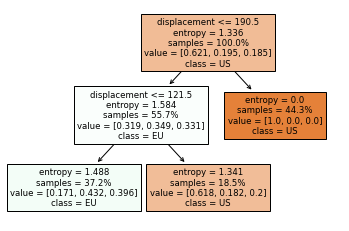

In [10]:
## Visualizing the decison tree of the model trained above
from sklearn import tree

ax=tree.plot_tree(clf_dect, feature_names=desc_features, class_names=target_names, 
               filled=True, proportion='True')

The most informative feature in the training data set is displacement when splitted on it's value=190.5

## Q4. Create a boosting ensemble. 
Using the `AdaBoostClassifier` from `sklearn.ensemble`, build a boosting ensemble. Boosting ensemble starts with a simple learning model, often a decision tree, and progressively updates the weights of the training instances to better predict the misclassified instances in previous iterations.

You are expected to use `DecisionTreeClassifier` (see `base_estimator` parameter in [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)) as your base estimator, with `max_depth` set to 2 as in the case of Q2. Use 4 estimators (`n_estimators=4`). 

After training and obtaining the error rate for your AdaBoost ensemble, evaluate the testing accuracy (or error rate). Note that you need to train and test using the same samples from Q1 and Q2. Compare your results with the accuracy scores from Q2.

In [11]:
## Defining the boosting ensemble using decision tree as base esrimator and other required parameters
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, 
                                                                   criterion='entropy',
                                                                   random_state = 0),n_estimators=4)
                             

In [12]:
## Training the ensemble model
clf_ada.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         random_state=0),
                   n_estimators=4)

In [13]:
y_pred = clf_ada.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.65

In [15]:
error_rate= 1-accuracy
error_rate

0.35

We can observe that the testing accuracy increased slightly(~3% increase) in case of ensemble boosting model as compared to decision tree classifier.

## Q5. Visualize the boosted trees
Visualize the individual estimators (base learners) in the AdaBoost classifier you have trained in Q4. Identify the similarities between the first estimator (the initially trained one in the ensemble) and the one you trained in Q2 (and visualized in Q3). How do the subsequent learners change? Which features are given more importance in the subsequent iterations? 

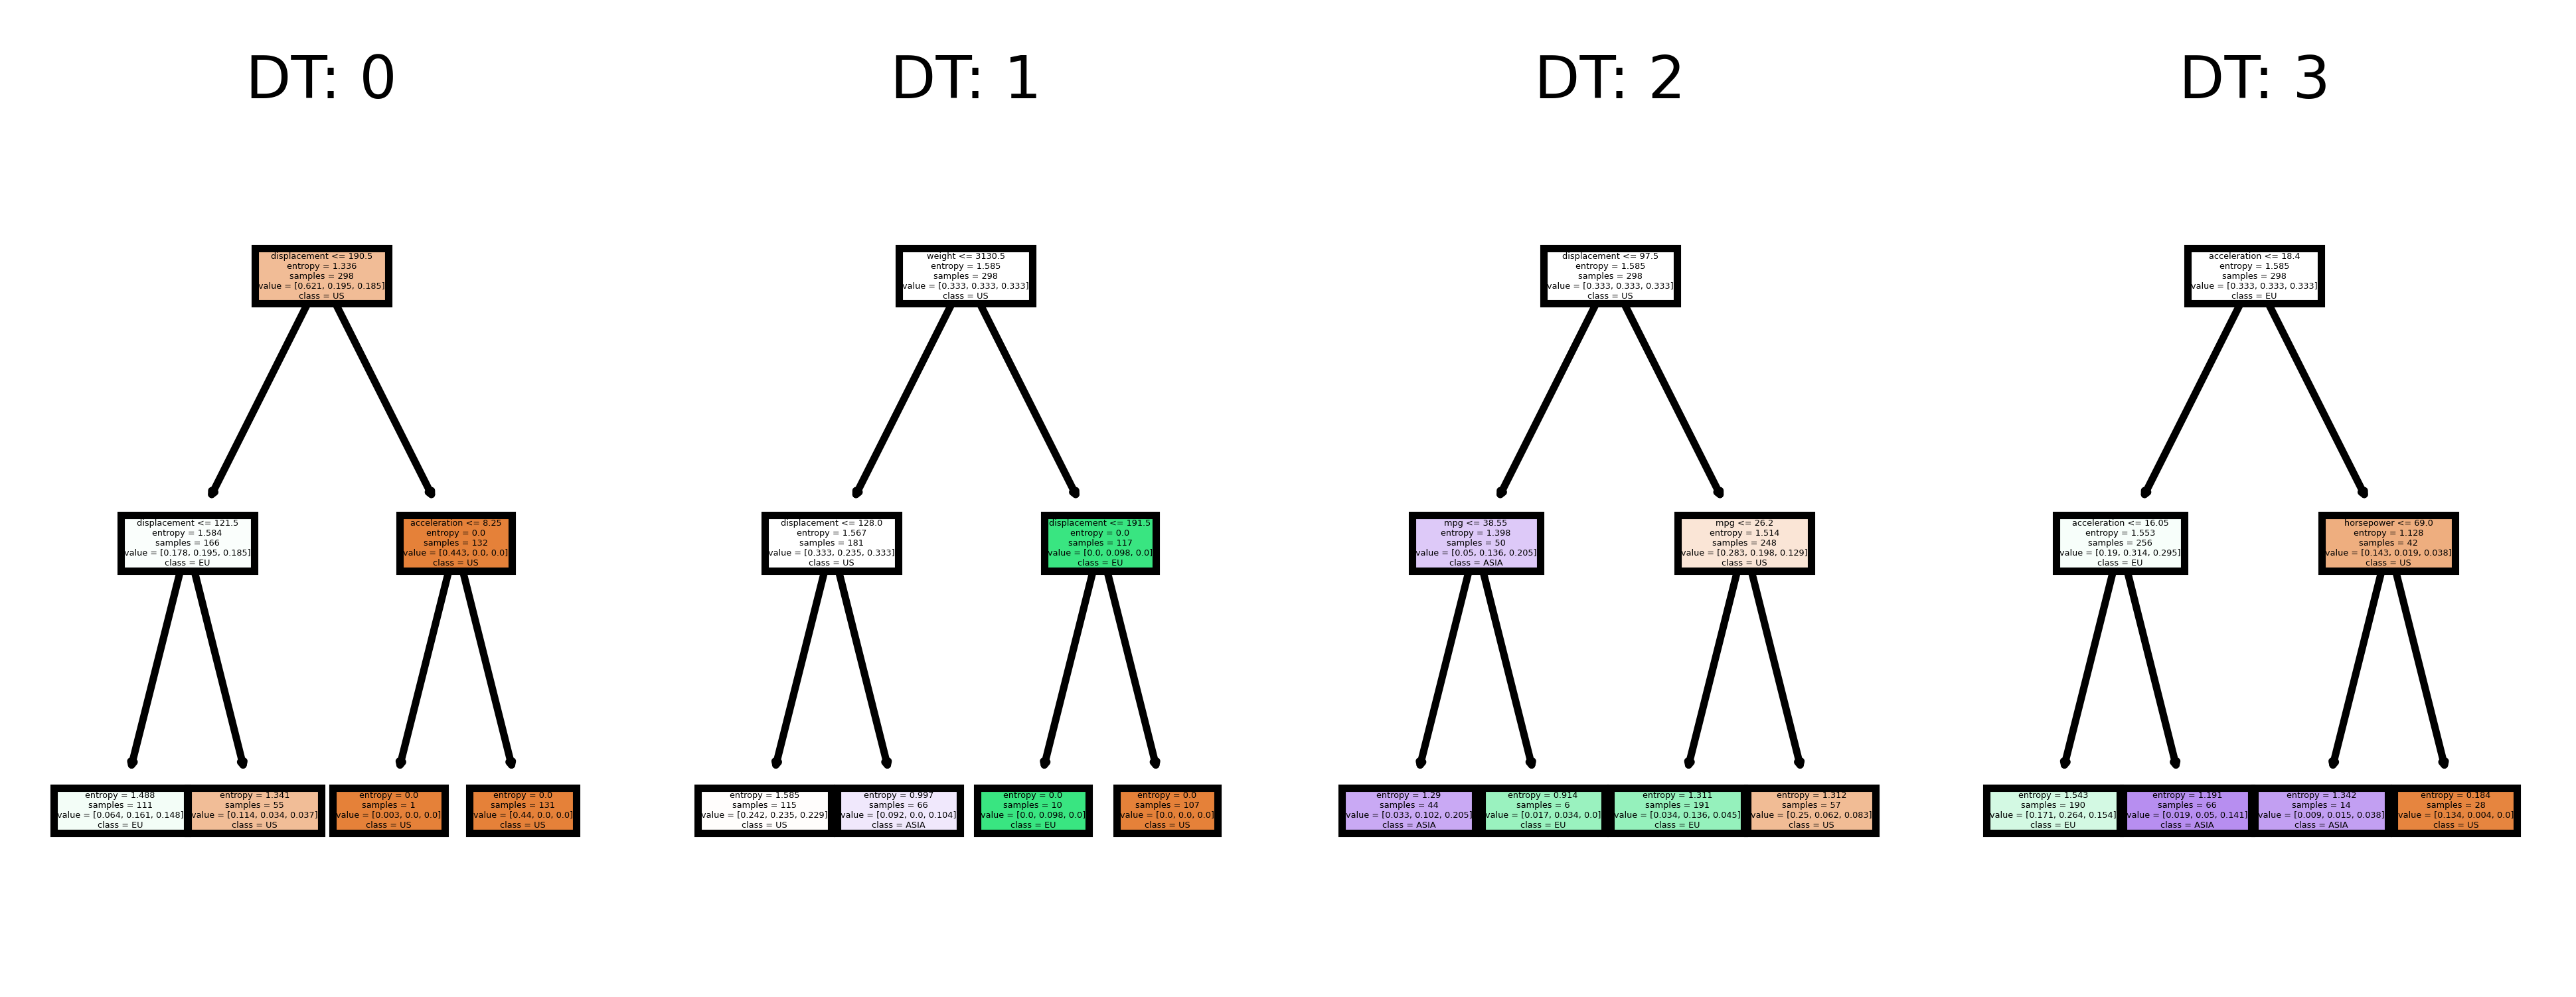

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (6,2), dpi=800)
for i in range(4):
    tree.plot_tree(clf_ada.estimators_[i],
                   feature_names = desc_features, 
                   class_names=target_names,
                   filled = True, 
                   ax = axes[i])
    axes[i].set_title('DT: ' + str(i), fontsize = 8)

We can observe that both decision tree classifier(Q2) and first estimator of ensemble classifier have choosen, displacement feature with split value as 190.5 as the root node. That means, this feature has highest information gain. Additionally, both the models have identical left parts of the trees. However, right part of trees are different in both the cases.

In subsequent iterations, the trees of the learners are quite different. We've got differet root nodes in subsequent learners. The features with highest information gain in feature are as follows:
1. DT-1 : Weight spliited on value 3130.5
2. DT-2 : Displacement splited on value 97.5
3. DT-3 : Accrleration splitted on value 18.4

## Q6. Increase the number of estimators and observe the error rate.
Progressively increase the number of estimators from 4 to 100 in your AdaBoostClassifier. Plot a line chart showing the progression of the error rate or accuracy as you increase the number of estimators in your ensemble. Based on your results, what do you think would be a good parameter for number of estimators? Why?

In [29]:
estimators = list(range(4,101))
accuracy_ls = []

for n_estimators in estimators:
    clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2, 
                                                                   criterion='entropy',
                                                                   random_state = 0),n_estimators=n_estimators)
    clf_ada.fit(X_train, Y_train)
    y_pred = clf_ada.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracy_ls.append(accuracy)



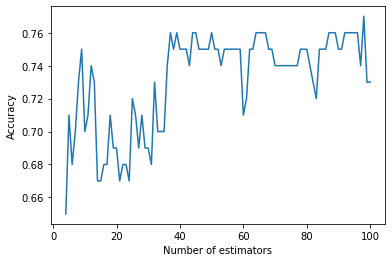

In [30]:
plt.plot(estimators, accuracy_ls)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

Acc to the plot, we can see the maximum accuracy is observed when the number of estimator value is 98. Hence, we can choose the value as 98.
But if computation is the issue and we can slightly compromise accuracy rate, then it makes more sense to choose 12 as n estimator value.